<h3>Exercise 1: Feature Selection with SelectKBest</h3>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

iris = load_iris()
X, y = iris.data, iris.target

selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [iris.feature_names[i] for i in selected_indices]

print("Selected Feature Names:", selected_feature_names)

<h3>Exercise 2: Feature Importance with Random Forest</h3>

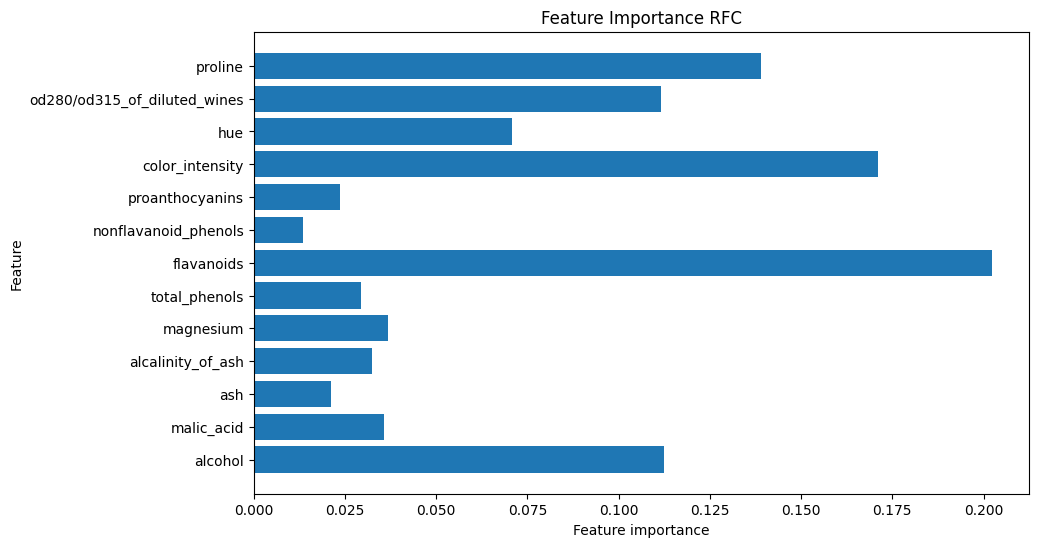

In [7]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
wine = load_wine()

X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

randClf = RandomForestClassifier(n_estimators = 100, random_state = 42)
randClf.fit(X_train, y_train)


importances = randClf.feature_importances_
feature_names = wine.feature_names

plt.figure(figsize = (10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature Importance RFC")

plt.show()




<h3>Exercise 3: Recursive Feature Elimination (RFE)</h3>


In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

breast_cancer = load_breast_cancer()
X, y=  breast_cancer.data, breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

svc = SVC(kernel = "linear")

rfe = RFE(estimator = svc, n_features_to_select = 5)
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

svc.fit(X_train_rfe, y_train)

y_pred = svc.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of SVM with RFE-selected features", accuracy)
print("Selected features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

Accuracy of SVM with RFE-selected features 0.8508771929824561
Selected features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True False]
Feature Ranking: [ 4 14 13 26  9  8  5  6  7 18 22  2 10 16 17 15 24 20 19 21  3 11 23 25
  1  1  1  1  1 12]


<h3>Exercise 4: L1 Regularization for Feature Selection </h3>


In [13]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1) 
lasso.fit(X_train, y_train)

selected_features = lasso.coef_ != 0
print("Selected features:", selected_features)

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

lasso_selected = Lasso(alpha=0.1)
lasso_selected.fit(X_train_selected, y_train)

y_pred = lasso_selected.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Selected features: [False  True  True  True  True False  True False  True  True]
Mean Squared Error: 2798.242907511305
R-squared Score: 0.47184545850451176


<h3>Classification Exercises



    
Exercise 1: Logistic Regression</h3>


Accuracy: 1.0


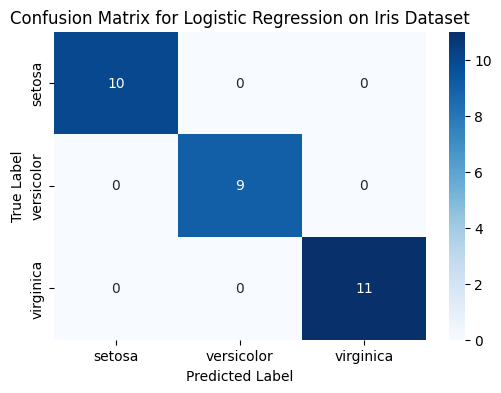

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression on Iris Dataset')
plt.show()


<h3>Exercise 2: Support Vector Machine (SVM)</h3>


Accuracy: 0.956140350877193


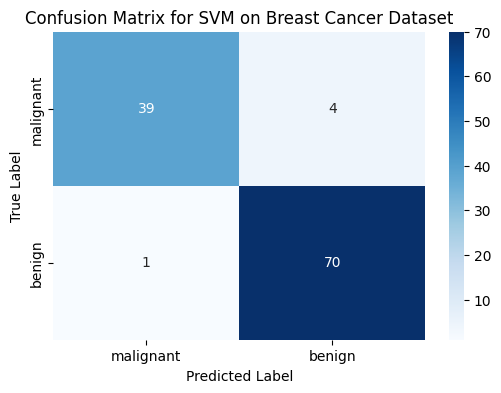

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM on Breast Cancer Dataset')
plt.show()


<h3>Exercise 3: Decision Tree Classifier</h3>

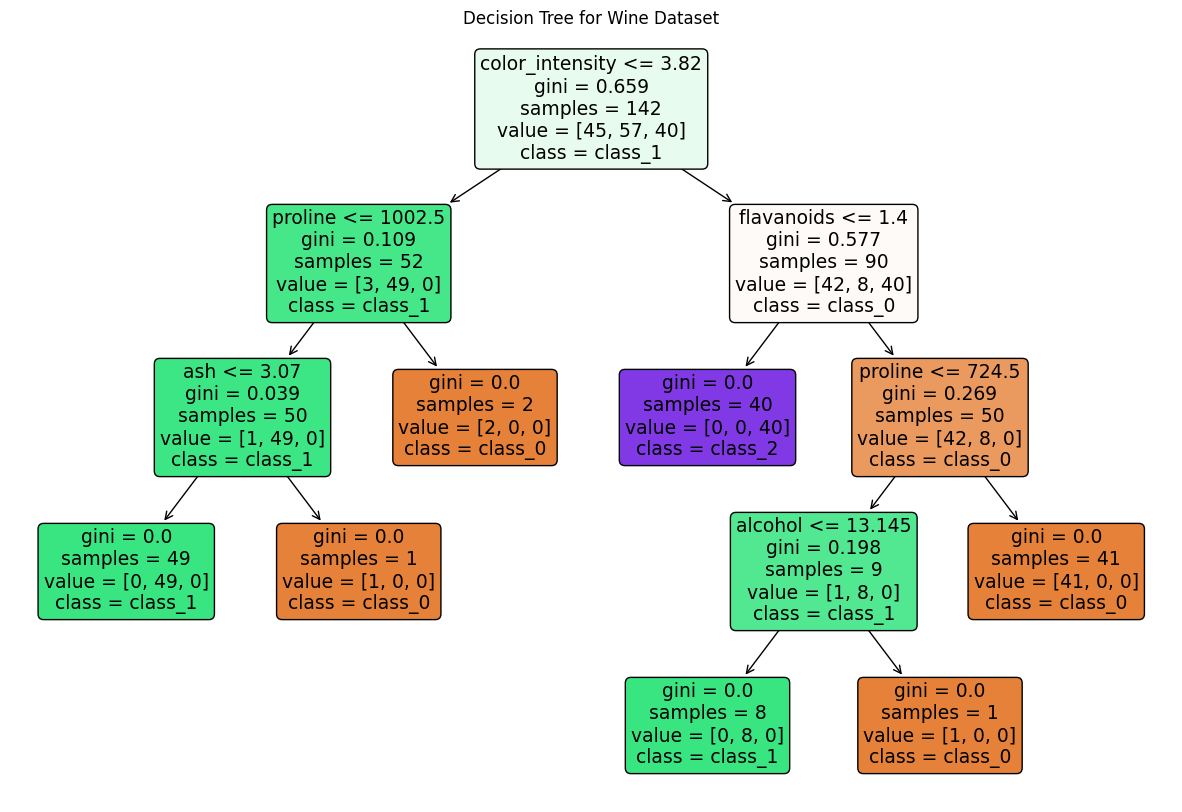

In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(dt_clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True)
plt.title("Decision Tree for Wine Dataset")
plt.show()


<h3>Regression Exercises
Exercise 1: Linear Regression</h3>


In [3]:
import ssl
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

california = fetch_california_housing()
X, y = california.data, california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 0.555891598695242
R-squared Score: 0.5757877060324526


<h3>Exercise 2: Ridge Regression</h3>


In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 3077.41593882723
R-squared Score: 0.41915292635986545


<h3>Exercise 3: Decision Tree Regression</h3>

Mean Squared Error (MSE): 0.495235205629094


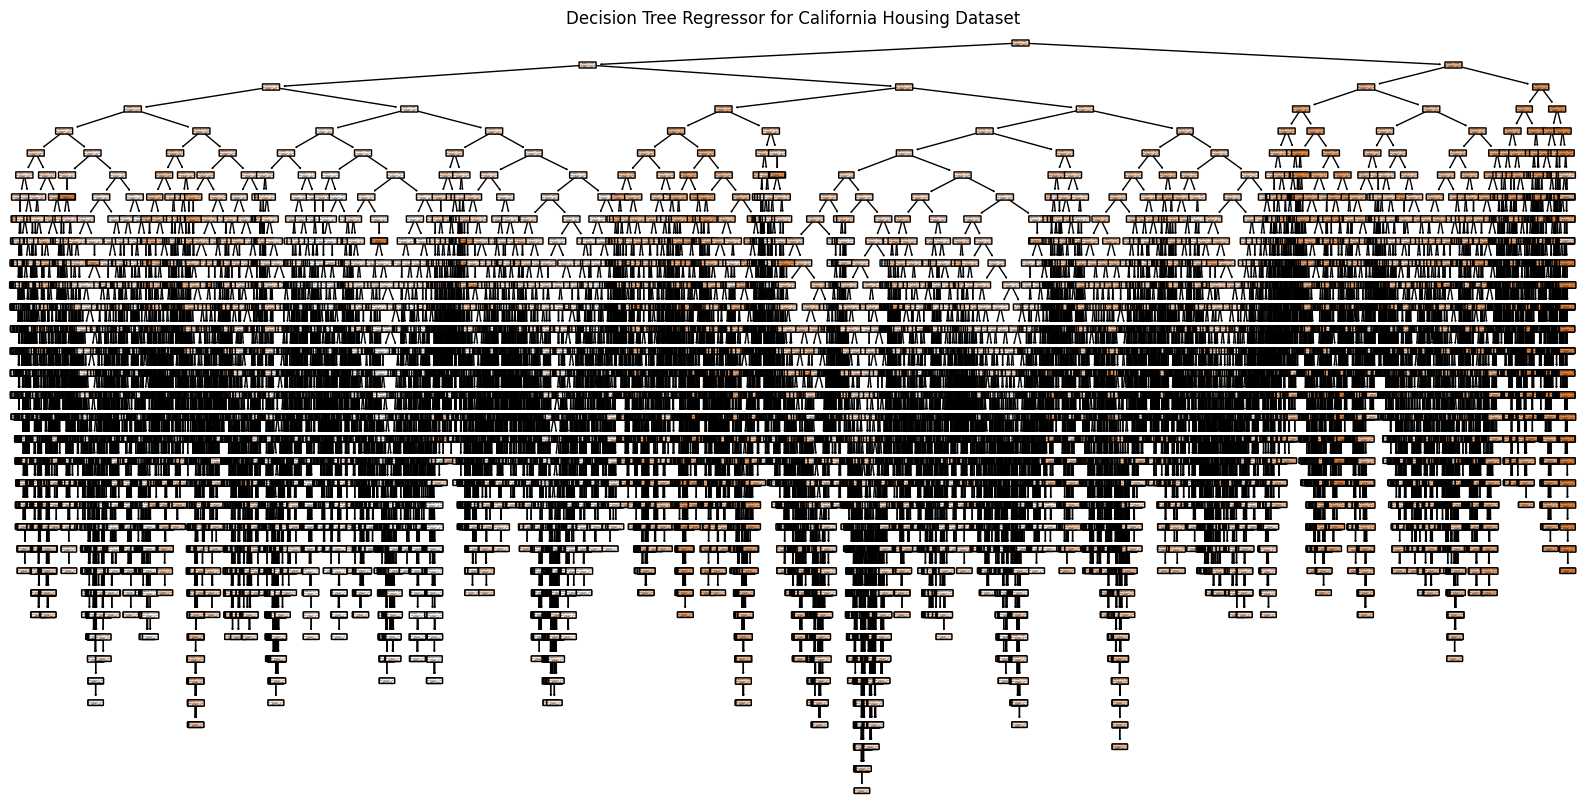

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

california = fetch_california_housing()
X, y = california.data, california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, feature_names=california.feature_names, filled=True, rounded=True)
plt.title("Decision Tree Regressor for California Housing Dataset")
plt.show()
